In [1]:
import os

data_folder = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400'

for root, dirs, files in os.walk(data_folder):
    level = root.replace(data_folder, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print('{}{}/'.format(indent, os.path.basename(root)))
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print('{}{}'.format(subindent, f))


BUU-LSPINE_400/
    metadata.csv
    yolov8_config.yaml
    BUU-LSPINE_400_report.xlsx
    AP/
        0363-F-062Y0.jpg
        0293-M-068Y0.csv
        0256-M-056Y0.csv
        0333-F-070Y0.jpg
        0022-M-006Y0.csv
        0090-F-016Y0.csv
        0460-F-019Y0.csv
        0070-F-027Y0.jpg
        0328-M-083Y0.jpg
        0107-F-033Y0.jpg
        0324-F-061Y0.csv
        0429-M-083Y0.csv
        0416-F-022Y0.jpg
        0198-F-063Y0.csv
        0480-M-052Y0.jpg
        0273-M-056Y0.csv
        0105-F-009Y0.jpg
        0245-F-086Y0.csv
        0148-M-058Y0.csv
        0158-F-072Y0.csv
        0458-M-020Y0.csv
        0040-M-023Y0.jpg
        0325-M-039Y0.csv
        0319-F-040Y0.jpg
        0327-F-079Y0.csv
        0412-F-023Y0.jpg
        0379-M-040Y0.jpg
        0385-F-071Y0.csv
        0258-F-058Y0.csv
        0151-M-079Y0.jpg
        0391-M-046Y0.csv
        0101-F-022Y0.jpg
        0418-F-025Y0.jpg
        0061-F-021Y0.csv
        0377-F-045Y0.csv
        0423-M-065Y0.csv
     

In [2]:
import os
import shutil

# Define paths
data_folder = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400'

# Define writable paths in /kaggle/working
working_folder = '/kaggle/working/BUU-LSPINE_400'
train_images_folder = os.path.join(working_folder, 'train', 'images')
val_images_folder = os.path.join(working_folder, 'val', 'images')
test_images_folder = os.path.join(working_folder, 'test', 'images')
ap_folder = os.path.join(working_folder, 'AP')
la_folder = os.path.join(working_folder, 'LA')

# Function to create directories if they don't exist
def create_dir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        print(f'Created directory: {directory}')

# Create writable directories
create_dir(train_images_folder)
create_dir(val_images_folder)
create_dir(test_images_folder)
create_dir(ap_folder)
create_dir(la_folder)

# Function to copy images based on naming convention
def copy_images_by_naming_convention(folder_path, destination_ap, destination_la):
    # List images in folder
    images = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    # Copy each image to appropriate destination folder
    for image in images:
        if image.endswith('0.jpg'):
            destination_folder = destination_ap
        elif image.endswith('1.jpg'):
            destination_folder = destination_la
        else:
            continue  # Skip if not AP or LA image

        src = os.path.join(folder_path, image)
        dst = os.path.join(destination_folder, image)
        shutil.copy(src, dst)
        print(f'Copied {image} to {destination_folder}')


# Copy train images
copy_images_by_naming_convention(train_images_folder, ap_folder, la_folder)

# Copy validation images
copy_images_by_naming_convention(val_images_folder, ap_folder, la_folder)

# Copy test images
copy_images_by_naming_convention(test_images_folder, ap_folder, la_folder)


Created directory: /kaggle/working/BUU-LSPINE_400/train/images
Created directory: /kaggle/working/BUU-LSPINE_400/val/images
Created directory: /kaggle/working/BUU-LSPINE_400/test/images
Created directory: /kaggle/working/BUU-LSPINE_400/AP
Created directory: /kaggle/working/BUU-LSPINE_400/LA


Image Path: /kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/AP/0338-F-027Y0.jpg
CSV Path: /kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/AP/0338-F-027Y0.csv


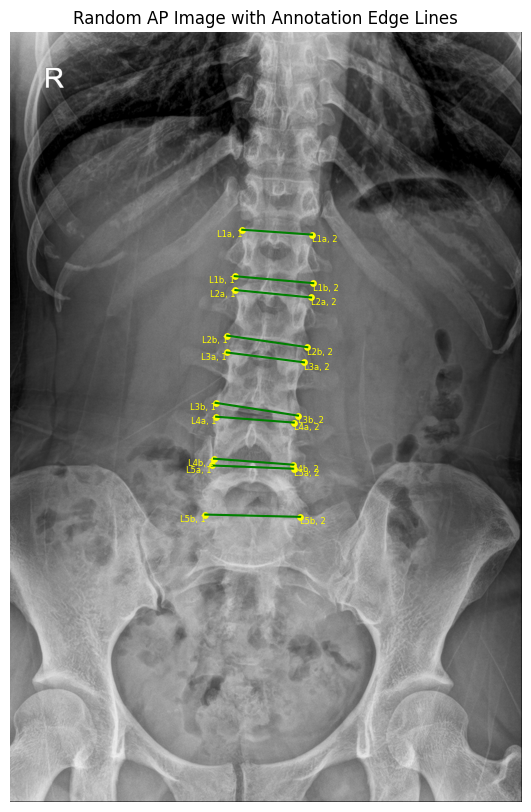

Image Path: /kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/LA/0494-F-066Y1.jpg
CSV Path: /kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/LA/0494-F-066Y1.csv


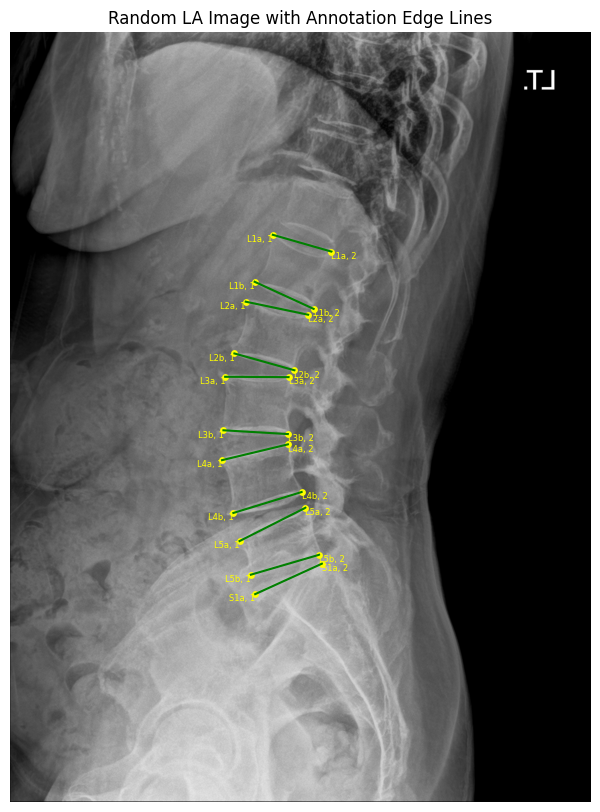

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import random

# Function to load and display an image with corresponding points from CSV
def display_random_image_with_points(image_dir, csv_dir, view):
    # List all image files in the directory
    image_files = os.listdir(image_dir)
    random_image_file = random.choice(image_files)

    # Construct paths
    image_path = os.path.join(image_dir, random_image_file)
    csv_path = os.path.join(csv_dir, random_image_file.replace('.jpg', '.csv').replace('.jpeg', '.csv').replace('.png', '.csv'))

    # Print debug information
    print(f"Image Path: {image_path}")
    print(f"CSV Path: {csv_path}")

    # Check file existence
    if not os.path.exists(image_path):
        print(f"Image file does not exist: {image_path}")
        return
    if not os.path.exists(csv_path):
        print(f"CSV file does not exist: {csv_path}")
        return

    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Unable to read image: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Read the CSV file
    points = pd.read_csv(csv_path, header=None)

    # Define labels for AP and LA views
    if 'AP' in view:
        labels = ['L1a, 1', 'L1a, 2', 'L1b, 1', 'L1b, 2',
                  'L2a, 1', 'L2a, 2', 'L2b, 1', 'L2b, 2',
                  'L3a, 1', 'L3a, 2', 'L3b, 1', 'L3b, 2',
                  'L4a, 1', 'L4a, 2', 'L4b, 1', 'L4b, 2',
                  'L5a, 1', 'L5a, 2', 'L5b, 1', 'L5b, 2']
    elif 'LA' in view:
        labels = ['L1a, 1', 'L1a, 2', 'L1b, 1', 'L1b, 2',
                  'L2a, 1', 'L2a, 2', 'L2b, 1', 'L2b, 2',
                  'L3a, 1', 'L3a, 2', 'L3b, 1', 'L3b, 2',
                  'L4a, 1', 'L4a, 2', 'L4b, 1', 'L4b, 2',
                  'L5a, 1', 'L5a, 2', 'L5b, 1', 'L5b, 2',
                  'S1a, 1', 'S1a, 2']

    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

    # Plot the points with annotations
    for index in range(0, len(points) - 1, 2):  # Iterate by pairs of edge lines
        # Check if enough rows remain to access the next pair of points
        if index + 1 < len(points):
            x1, y1, x2, y2, _ = points.iloc[index]  # First point
            x3, y3, x4, y4, _ = points.iloc[index + 1]  # Second point

            # Get unique labels for this pair
            label1 = labels[index // 2 * 4]
            label2 = labels[index // 2 * 4 + 1]
            label3 = labels[index // 2 * 4 + 2]
            label4 = labels[index // 2 * 4 + 3]

            # Plot points as small yellow circles
            plt.scatter([x1, x2], [y1, y2], color='yellow', s=15)

            # Display labels near the points
            plt.text(x1, y1, label1, color='yellow', fontsize=6, ha='right', va='top')
            plt.text(x2, y2, label2, color='yellow', fontsize=6, ha='left', va='top')

            # Connect the points with a line
            plt.plot([x1, x2], [y1, y2], color='green')

            # Plot points for the second pair
            plt.scatter([x3, x4], [y3, y4], color='yellow', s=15)

            # Display labels near the points for the second pair
            plt.text(x3, y3, label3, color='yellow', fontsize=6, ha='right', va='top')
            plt.text(x4, y4, label4, color='yellow', fontsize=6, ha='left', va='top')

            # Connect the points of the second pair with a line
            plt.plot([x3, x4], [y3, y4], color='green')

    # Add the first sacral vertebra edge line (points 21 and 22) for LA view
    if 'LA' in view and len(points) > 10:
        x1, y1, x2, y2, _ = points.iloc[10]  # S1a, 1 and S1a, 2

        # Get labels for sacral vertebra
        label1 = labels[20]
        label2 = labels[21]

        # Plot points as small yellow circles
        plt.scatter([x1, x2], [y1, y2], color='yellow', s=15)

        # Display labels near the points
        plt.text(x1, y1, label1, color='yellow', fontsize=6, ha='right', va='top')
        plt.text(x2, y2, label2, color='yellow', fontsize=6, ha='left', va='top')

        # Connect the points with a line
        plt.plot([x1, x2], [y1, y2], color='green')

    plt.title(f'Random {view} Image with Annotation Edge Lines')
    plt.axis('off')  # Hide axis for cleaner visualization
    plt.show()

# Example paths
ap_image_dir = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/AP'  # Directory containing AP view images
ap_csv_dir = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/AP'  # Directory containing corresponding CSV files

la_image_dir = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/LA'  # Directory containing LA view images
la_csv_dir = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/LA'  # Directory containing corresponding CSV files

# Display random image with points for AP and LA views
display_random_image_with_points(ap_image_dir, ap_csv_dir, 'AP')
display_random_image_with_points(la_image_dir, la_csv_dir, 'LA')


In [5]:
filename = "0020-M-030Y1.jpg"

# Split filename by hyphen to extract parts
parts = filename.split('-')

# Extract Patient_ID (parts[0])
patient_id = parts[0]

# Extract Gender (parts[1])
gender = parts[1]

# Extract Age (parts[2][:3] to get the first three characters)
age = parts[2][:3]  # Extracts "037"

# Extract View_Type (last character of parts[2])
view_type = 'AP' if parts[2][-1] == '0' else 'LA'

print(f"Patient_ID: {patient_id}")
print(f"Gender: {gender}")
print(f"Age: {age}")
print(f"View_Type: {view_type}")


Patient_ID: 0020
Gender: M
Age: 030
View_Type: LA


In [6]:
from sklearn.model_selection import train_test_split

import pandas as pd
import os
import shutil


# Function to update paths in metadata CSV
def update_metadata_paths(metadata_csv_path, data_folder):
    df = pd.read_csv(metadata_csv_path)

    updated_image_paths = []
    updated_csv_paths = []

    for index, row in df.iterrows():
        image_path = row['Image_Path']
        csv_path = row['CSV_Path']

        # Extract image name
        image_name = os.path.basename(image_path)
        csv_name = os.path.basename(csv_path)
        
        # Update paths
        updated_image_path = os.path.join(data_folder, row['View_Type'], image_name)
        updated_csv_path = os.path.join(data_folder, row['View_Type'], csv_name)

        updated_image_paths.append(updated_image_path)
        updated_csv_paths.append(updated_csv_path)

    # Assign updated paths back to dataframe
    df['Image_Path'] = updated_image_paths
    df['CSV_Path'] = updated_csv_paths

    # Save updated metadata CSV
    updated_metadata_path = os.path.join('/kaggle/working', os.path.basename(metadata_csv_path))
    df.to_csv(updated_metadata_path, index=False)
    print(f"Updated metadata saved to: {updated_metadata_path}")

# Define paths
data_folder = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400'
metadata_csv_path = '/kaggle/input/spine-x-rays-vertebrae-detection/BUU-LSPINE_400/metadata.csv'
working_metadata_path = '/kaggle/working/metadata.csv'

df = pd.read_csv(metadata_csv_path)

# Copy metadata CSV to working directory
shutil.copy(metadata_csv_path, working_metadata_path)

# Update paths in metadata CSV
update_metadata_paths(working_metadata_path, data_folder)



# Reload DataFrame from updated metadata CSV
df = pd.read_csv(working_metadata_path)

# Split the dataset into train, validation, and test sets (80%, 10%, 10%)
train_df, val_test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_test_df, test_size=0.5, random_state=42)

# Save train, validation, and test CSVs
train_csv_path = '/kaggle/working/train_metadata.csv'
val_csv_path = '/kaggle/working/val_metadata.csv'
test_csv_path = '/kaggle/working/test_metadata.csv'

train_df.to_csv(train_csv_path, index=False)
val_df.to_csv(val_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)

print(f"Train metadata saved to: {train_csv_path}")
print(f"Validation metadata saved to: {val_csv_path}")
print(f"Test metadata saved to: {test_csv_path}")


Updated metadata saved to: /kaggle/working/metadata.csv
Train metadata saved to: /kaggle/working/train_metadata.csv
Validation metadata saved to: /kaggle/working/val_metadata.csv
Test metadata saved to: /kaggle/working/test_metadata.csv


In [21]:
!pip install tensorflow pandas opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 8.3 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.


In [22]:
pip install wurlitzer

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip check


cudf 24.4.1 requires cubinlinker, which is not installed.
cudf 24.4.1 requires cupy-cuda11x, which is not installed.
cudf 24.4.1 requires ptxcompiler, which is not installed.
cuml 24.4.0 requires cupy-cuda11x, which is not installed.
dask-cudf 24.4.1 requires cupy-cuda11x, which is not installed.
keras-cv 0.9.0 requires keras-core, which is not installed.
keras-nlp 0.12.1 requires keras-core, which is not installed.
aiobotocore 2.13.0 has requirement aiohttp<4.0.0,>=3.9.2, but you have aiohttp 3.9.1.
apache-beam 2.46.0 has requirement dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8.
apache-beam 2.46.0 has requirement numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4.
apache-beam 2.46.0 has requirement pyarrow<10.0.0,>=3.0.0, but you have pyarrow 14.0.2.
beatrix-jupyterlab 2023.128.151533 has requirement jupyterlab~=3.6.0, but you have jupyterlab 4.2.1.
boto3 1.26.100 has requirement botocore<1.30.0,>=1.29.100, but you have botocore 1.34.106.
cloud-tpu-client 0.10 has requirement google-ap

In [11]:
import pandas as pd
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split

# Update paths to reflect the correct directory structure in Kaggle
train_metadata_path = '/kaggle/working/train_metadata.csv'
val_metadata_path = '/kaggle/working/val_metadata.csv'
test_metadata_path = '/kaggle/working/test_metadata.csv'
working_metadata_path = '/kaggle/working/metadata.csv'

# Function to load image and keypoints
def load_image_and_keypoints(image_path, csv_path, image_size=(640, 640)):
    # Check if image path exists
    if not tf.io.gfile.exists(image_path):
        raise FileNotFoundError(f"Image file not found: {image_path}")

    # Read image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, image_size)

    # Read keypoints
    keypoints = pd.read_csv(csv_path, header=None).values[:, :4].flatten()

    return image, keypoints

# Function to create dataset from metadata and resize images to 224x224
def create_dataset_resized(working_metadata_path, image_size=(640, 640), target_size=(224, 224), view='AP'):
    metadata = pd.read_csv(working_metadata_path)
    images = []
    keypoints = []

    for index, row in metadata.iterrows():
        if row['View_Type'] == view:
            image_path = row['Image_Path']
            csv_path = row['CSV_Path']
            try:
                image, kp = load_image_and_keypoints(image_path, csv_path, image_size=image_size)
                image_resized = cv2.resize(image, target_size)  # Resize image to target size
                images.append(image_resized)
                keypoints.append(kp)
            except Exception as e:
                print(f"Error loading {image_path}: {e}")

    images = np.array(images, dtype='float32') / 255.0
    keypoints = np.array(keypoints, dtype='float32')

    return images, keypoints

# Create datasets for AP and LA views separately with resizing to 224x224
train_images_ap_resized, train_keypoints_ap_resized = create_dataset_resized(train_metadata_path, view='AP', target_size=(224, 224))
train_images_la_resized, train_keypoints_la_resized = create_dataset_resized(train_metadata_path, view='LA', target_size=(224, 224))

val_images_ap_resized, val_keypoints_ap_resized = create_dataset_resized(val_metadata_path, view='AP', target_size=(224, 224))
val_images_la_resized, val_keypoints_la_resized = create_dataset_resized(val_metadata_path, view='LA', target_size=(224, 224))

test_images_ap_resized, test_keypoints_ap_resized = create_dataset_resized(test_metadata_path, view='AP', target_size=(224, 224))
test_images_la_resized, test_keypoints_la_resized = create_dataset_resized(test_metadata_path, view='LA', target_size=(224, 224))


In [13]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau



# Function to create MobileNetV2 model for key point detection
def create_mobilenet_model(input_shape=(224, 224, 3), num_keypoints=20):
    base_model = MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_keypoints * 2, activation='linear')(x)  # num_keypoints * 2 for x and y coordinates
    model = Model(inputs=base_model.input, outputs=outputs)
    return model

# Creating separate models for AP and LA views

model_ap = create_mobilenet_model(input_shape=(224, 224, 3), num_keypoints=20)
model_la = create_mobilenet_model(input_shape=(224, 224, 3), num_keypoints=22)


# Defining my optimizers with learning rate
optimizer_ap = Adam(learning_rate=0.001)
optimizer_la = Adam(learning_rate=0.001)


# Compiling models

model_ap.compile(optimizer=optimizer_ap, loss='mean_absolute_error', metrics=['mean_squared_error'])
model_la.compile(optimizer=optimizer_la, loss='mean_absolute_error', metrics=['mean_squared_error'])


# [Optional] adding a learning rate scheduler
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


# Callbacks for AP Model
ap_callbacks = [
    ModelCheckpoint('best_ap_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min', min_lr=1e-6)
]

# Callbacks for LA Model
la_callbacks = [
    ModelCheckpoint('best_la_model.keras', save_best_only=True, monitor='val_loss', mode='min', verbose=1),
    EarlyStopping(monitor='val_loss', patience=150, restore_best_weights=True, verbose=1),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=1, mode='min', min_lr=1e-6)
]







In [30]:
# Train the AP model with callbacks
history_ap = model_ap.fit(train_images_ap_resized, train_keypoints_ap_resized,
                          validation_data=(val_images_ap_resized, val_keypoints_ap_resized),
                          batch_size=32,
                          epochs=200,
                          callbacks=ap_callbacks)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 110.6727 - mean_squared_error: 20293.7852
Epoch 1: val_loss improved from inf to 111.06400, saving model to best_ap_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 110.8411 - mean_squared_error: 20375.0625 - val_loss: 111.0640 - val_mean_squared_error: 19827.0059 - learning_rate: 1.0000e-06
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 108.3763 - mean_squared_error: 18906.4531
Epoch 2: val_loss improved from 111.06400 to 110.98077, saving model to best_ap_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 108.7639 - mean_squared_error: 19128.8789 - val_loss: 110.9808 - val_mean_squared_error: 19795.6406 - learning_rate: 1.0000e-06
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 109.5639 - mean_squared_error: 20306.9434
Epoch 3: val_loss improved from 110.98077 to 110.89330, saving model to best_ap_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 180ms/step - loss: 109.8484 - mean_sq

In [31]:
# Train the LA model with callbacks
history_la = model_la.fit(train_images_la_resized, train_keypoints_la_resized,
                          validation_data=(val_images_la_resized, val_keypoints_la_resized),
                          batch_size=32,
                          epochs=200,
                          callbacks=la_callbacks)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 495.6923 - mean_squared_error: 369941.5312
Epoch 1: val_loss improved from inf to 405.01968, saving model to best_la_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - loss: 495.3672 - mean_squared_error: 369529.6250 - val_loss: 405.0197 - val_mean_squared_error: 253651.1406 - learning_rate: 1.0000e-05
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 489.7682 - mean_squared_error: 361410.9062
Epoch 2: val_loss improved from 405.01968 to 402.67993, saving model to best_la_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - loss: 489.7188 - mean_squared_error: 361494.6875 - val_loss: 402.6799 - val_mean_squared_error: 250168.4219 - learning_rate: 1.0000e-05
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 487.9086 - mean_squared_error: 358375.5000
Epoch 3: val_loss improved from 402.67993 to 401.56827, saving model to best_la_model.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 487.6569 - 

In [32]:
model_ap.save('C:/Users/Lenovo/Downloads/best_ap_model.h5')
model_la.save('C:/Users/Lenovo/Downloads/best_la_model.h5')


In [27]:
from tensorflow.keras.models import Model, load_model
from scipy.spatial.distance import euclidean


# Save the training history for later evaluation
import pickle

with open('history_ap.pkl', 'wb') as f:
    pickle.dump(history_ap.history, f)

with open('history_la.pkl', 'wb') as f:
    pickle.dump(history_la.history, f)



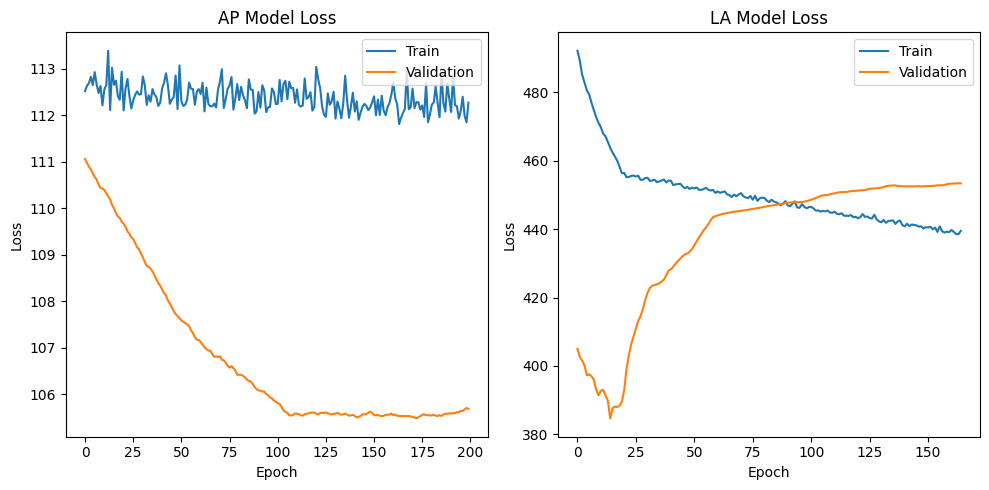

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_ap.history['loss'])
plt.plot(history_ap.history['val_loss'])
plt.title('AP Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_la.history['loss'])
plt.plot(history_la.history['val_loss'])
plt.title('LA Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()

plt.show()


In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from scipy.spatial.distance import euclidean

# Load the best saved models
ap_model = load_model('C:/Users/Lenovo/Downloads/best_ap_model.h5')
la_model = load_model('C:/Users/Lenovo/Downloads/best_la_model.h5')

# Define batch size
batch_size = 4  # Adjust based on available memory

# Function to make predictions in batches
def predict_in_batches(model, data, batch_size):
    predictions = []
    num_batches = len(data) // batch_size + int(len(data) % batch_size != 0)
    for i in range(num_batches):
        batch_data = data[i*batch_size:(i+1)*batch_size]
        batch_predictions = model.predict(batch_data)
        predictions.extend(batch_predictions)
    return np.array(predictions)

# Predict using AP model in batches
pred_ap_keypoints = predict_in_batches(ap_model, test_images_ap_resized, batch_size)

# Predict using LA model in batches
pred_la_keypoints = predict_in_batches(la_model, test_images_la_resized, batch_size)

# Function to calculate Euclidean distances
def calculate_distances(true_keypoints, pred_keypoints):
    distances = []
    for true_kp, pred_kp in zip(true_keypoints, pred_keypoints):
        # Assuming keypoints are in pairs (x1, y1, x2, y2, ...)
        for i in range(0, len(true_kp), 2):
            true_point = true_kp[i:i+2]
            pred_point = pred_kp[i:i+2]
            distance = euclidean(true_point, pred_point)
            distances.append(distance)
    return distances

# Calculate distances for AP view
distances_ap = calculate_distances(test_keypoints_ap_resized, pred_ap_keypoints)

# Calculate distances for LA view
distances_la = calculate_distances(test_keypoints_la_resized, pred_la_keypoints)

# Calculate mean and standard deviation of distances
mean_distance_ap = np.mean(distances_ap)
std_distance_ap = np.std(distances_ap)

mean_distance_la = np.mean(distances_la)
std_distance_la = np.std(distances_la)

print(f"AP View - Mean Distance: {mean_distance_ap:.4f}, Std Dev: {std_distance_ap:.4f}")
print(f"LA View - Mean Distance: {mean_distance_la:.4f}, Std Dev: {std_distance_la:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


W0000 00:00:1719924582.191023     120 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


W0000 00:00:1719924587.577484     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


W0000 00:00:1719924590.551027     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
AP View - Mean Distance: 179.8681, Std Dev: 108.8408
LA View - Mean Distance: 661.6809, Std Dev: 333.3155


W0000 00:00:1719924594.035481     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [35]:
# Predict using AP model
pred_ap_keypoints = ap_model.predict(test_images_ap)

# Predict using LA model
pred_la_keypoints = la_model.predict(test_images_la)

2024-07-02 12:50:44.371011: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng12{k5=1,k6=0,k7=1,k10=1} for conv (f32[32,32,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,320,320]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=32, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0} is taking a while...
2024-07-02 12:50:44.641205: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.270397697s
Trying algorithm eng12{k5=1,k6=0,k7=1,k10=1} for conv (f32[32,32,320,320]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,320,320]{3,2,1,0}, f32[32,1,3,3]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, feature_group_count=32, custom_call_target="__cudnn$convForward", backend_config={"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyr

1/2 ━━━━━━━━━━━━━━━━━━━━ 30s 31s/step

W0000 00:00:1719924668.832781     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 43s 12s/step


W0000 00:00:1719924680.521979     119 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

W0000 00:00:1719924684.151419     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 8s/step


W0000 00:00:1719924692.532220     121 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [ ]:
import numpy as np

# Calculate mean and standard deviation of distances
mean_distance_ap = np.mean(distances_ap)
std_distance_ap = np.std(distances_ap)

mean_distance_la = np.mean(distances_la)
std_distance_la = np.std(distances_la)

print(f"AP View - Mean Distance: {mean_distance_ap:.4f}, Std Dev: {std_distance_ap:.4f}")
print(f"LA View - Mean Distance: {mean_distance_la:.4f}, Std Dev: {std_distance_la:.4f}")


In [ ]:
from scipy.spatial.distance import euclidean

def calculate_distances(true_keypoints, pred_keypoints):
    distances = []
    for true_kp, pred_kp in zip(true_keypoints, pred_keypoints):
        distance = euclidean(true_kp, pred_kp)
        distances.append(distance)
    return distances

# Calculate distances for AP view
distances_ap = calculate_distances(test_keypoints_ap, pred_ap_keypoints)

# Calculate distances for LA view
distances_la = calculate_distances(test_keypoints_la, pred_la_keypoints)

In [ ]:
import numpy as np

# Calculate mean and standard deviation of distances
mean_distance_ap = np.mean(distances_ap)
std_distance_ap = np.std(distances_ap)

mean_distance_la = np.mean(distances_la)
std_distance_la = np.std(distances_la)

print(f"AP View - Mean Distance: {mean_distance_ap:.4f}, Std Dev: {std_distance_ap:.4f}")
print(f"LA View - Mean Distance: {mean_distance_la:.4f}, Std Dev: {std_distance_la:.4f}")


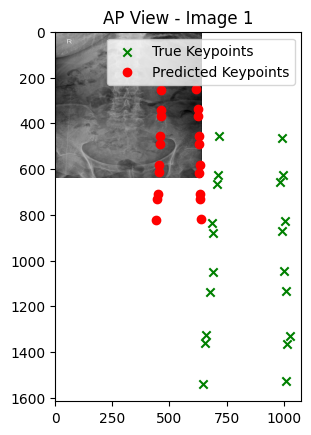

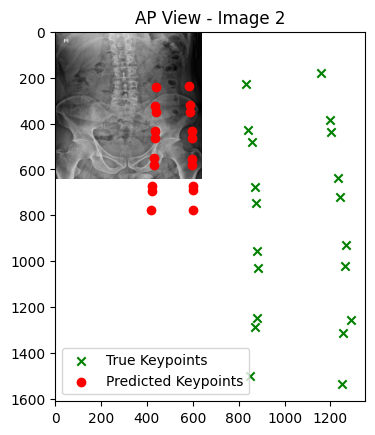

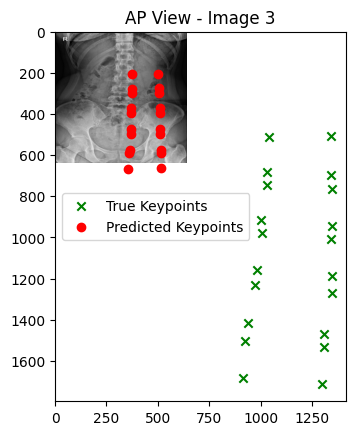

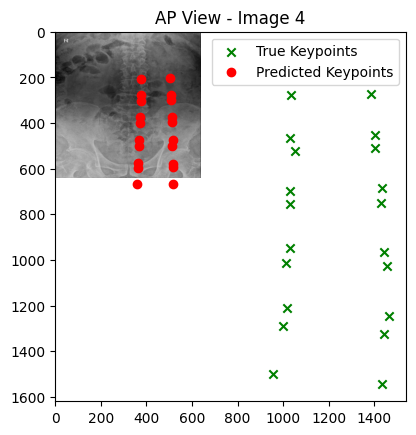

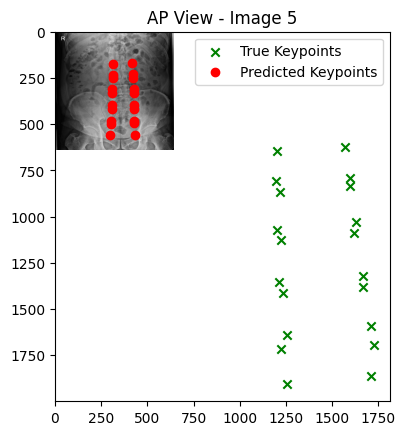

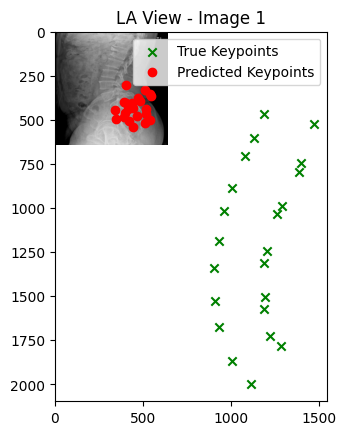

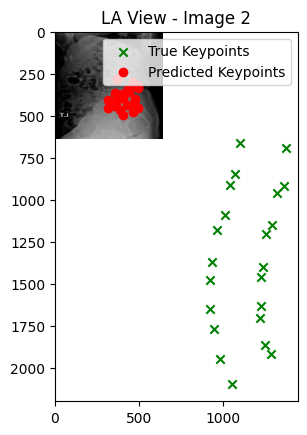

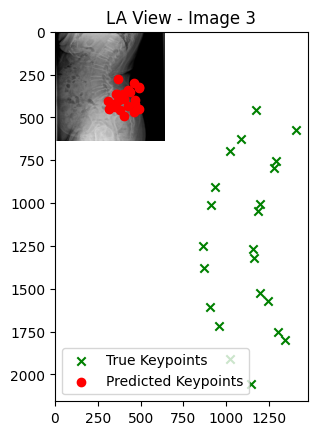

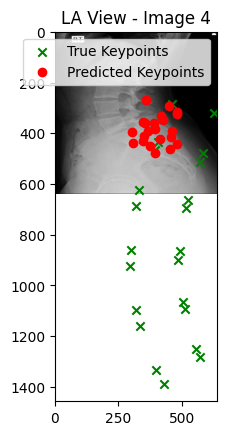

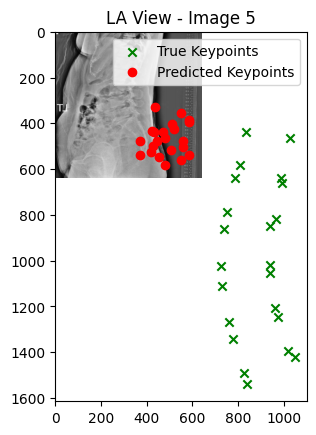

In [36]:
import matplotlib.pyplot as plt

# Function to plot image with true and predicted keypoints
def plot_keypoints(image, true_keypoints, pred_keypoints, title="Keypoints"):
    plt.imshow(image)
    true_x = true_keypoints[0::2]
    true_y = true_keypoints[1::2]
    pred_x = pred_keypoints[0::2]
    pred_y = pred_keypoints[1::2]
    
    plt.scatter(true_x, true_y, c='green', marker='x', label='True Keypoints')
    plt.scatter(pred_x, pred_y, c='red', marker='o', label='Predicted Keypoints')
    plt.title(title)
    plt.legend()
    plt.show()

# Select a few images to visualize
num_images_to_display = 5

# Display AP view predictions
for i in range(num_images_to_display):
    plot_keypoints(test_images_ap[i], test_keypoints_ap[i], pred_ap_keypoints[i], title=f"AP View - Image {i+1}")

# Display LA view predictions
for i in range(num_images_to_display):
    plot_keypoints(test_images_la[i], test_keypoints_la[i], pred_la_keypoints[i], title=f"LA View - Image {i+1}")


In [ ]:
!pip install ultralytics


In [ ]:
import pandas as pd
import os

# Defining the class mapping
class_map = {
    'AP': {
        'APL1': 1, 'APL2': 2, 'APL3': 3, 'APL4': 4, 'APL5': 5
    },
    'LA': {
        'LAL1': 1, 'LAL2': 2, 'LAL3': 3, 'LAL4': 4, 'LAL5': 5,
        'S1a': 11
    }
}

# Function to convert coordinates to YOLO format
def convert_to_yolo_format(image_width, image_height, x1, y1, x2, y2):
    x_center = (x1 + x2) / 2.0 / image_width
    y_center = (y1 + y2) / 2.0 / image_height
    width = abs(x2 - x1) / image_width
    height = abs(y2 - y1) / image_height
    return x_center, y_center, width, height

# Function to generate class_id based on edge line and view
def get_class_id(edge_line, view):
    return class_map[view].get(edge_line, -1)  # Return -1 if not found

# Function to generate YOLO annotations from CSV
def generate_yolo_annotations(image_dir, csv_dir, output_dir, view):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for image_file in os.listdir(image_dir):
        if image_file.lower().endswith('.jpg') or image_file.lower().endswith('.jpeg') or image_file.lower().endswith('.png'):
            image_path = os.path.join(image_dir, image_file)
            csv_path = os.path.join(csv_dir, image_file.replace('.jpg', '.csv').replace('.jpeg', '.csv').replace('.png', '.csv'))

            if os.path.exists(csv_path):
                # Read the image to get its dimensions
                image = cv2.imread(image_path)
                image_height, image_width, _ = image.shape

                # Read the CSV file
                points = pd.read_csv(csv_path, header=None)

                # Prepare the output annotation file
                annotation_file = os.path.join(output_dir, image_file.replace('.jpg', '.txt').replace('.jpeg', '.txt').replace('.png', '.txt'))

                with open(annotation_file, 'w') as f:
                    for index, row in points.iterrows():
                        x1, y1, x2, y2, _ = row  # Assuming CSV columns are x1, y1, x2, y2, class_id
                        class_id = get_class_id(f'L{index + 1}a', view)  # Assuming rows are labeled L1a, L2a, ..., S1a for LA view
                        if class_id != -1:  # Only write valid classes
                            x_center, y_center, width, height = convert_to_yolo_format(image_width, image_height, x1, y1, x2, y2)
                            f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

# Example paths
ap_image_dir = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400/AP'  # Directory containing AP view images
ap_csv_dir = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400/AP'  # Directory containing corresponding CSV files
ap_output_dir = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400/AP_YOLO_annotations'  # Output directory for YOLO annotations

la_image_dir = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400/LA'  # Directory containing LA view images
la_csv_dir = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400/LA'  # Directory containing corresponding CSV files
la_output_dir = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400/LA_YOLO_annotations'  # Output directory for YOLO annotations

# Generate YOLO annotations for AP and LA views
generate_yolo_annotations(ap_image_dir, ap_csv_dir, ap_output_dir, 'AP')
generate_yolo_annotations(la_image_dir, la_csv_dir, la_output_dir, 'LA')


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
data_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400'
ap_folder = os.path.join(data_folder, 'AP')
la_folder = os.path.join(data_folder, 'LA')

# Function to gather images
def gather_images(data_folder):
    ap_images = [os.path.join(ap_folder, f) for f in os.listdir(ap_folder) if f.lower().endswith('.jpg')]
    la_images = [os.path.join(la_folder, f) for f in os.listdir(la_folder) if f.lower().endswith('.jpg')]
    return ap_images, la_images

# Function to split dataset
def split_dataset(images, val_ratio=0.1, test_ratio=0.1):
    train_images, temp_images = train_test_split(images, test_size=(val_ratio + test_ratio), random_state=42)
    val_images, test_images = train_test_split(temp_images, test_size=test_ratio / (val_ratio + test_ratio), random_state=42)
    return train_images, val_images, test_images

# Function to move files to respective folders
def move_files(file_list, dest_folder):
    os.makedirs(dest_folder, exist_ok=True)
    for file_name in file_list:
        shutil.move(file_name, dest_folder)
        print(f"Moved {file_name} to {dest_folder}")

# Gather AP and LA images
ap_images, la_images = gather_images(data_folder)

# Split AP and LA images into train, val, test
train_ap_images, val_ap_images, test_ap_images = split_dataset(ap_images)
train_la_images, val_la_images, test_la_images = split_dataset(la_images)

# Define folders
train_folder = os.path.join(data_folder, 'train', 'images')
val_folder = os.path.join(data_folder, 'val', 'images')
test_folder = os.path.join(data_folder, 'test', 'images')

# Move images to respective train, val, test folders
move_files(train_ap_images, train_folder)
move_files(val_ap_images, val_folder)
move_files(test_ap_images, test_folder)

move_files(train_la_images, train_folder)
move_files(val_la_images, val_folder)
move_files(test_la_images, test_folder)

# Display number of images in each set
print(f"Train AP images: {len(train_ap_images)}, Train LA images: {len(train_la_images)}")
print(f"Val AP images: {len(val_ap_images)}, Val LA images: {len(val_la_images)}")
print(f"Test AP images: {len(test_ap_images)}, Test LA images: {len(test_la_images)}")


In [ ]:
config_content = """
path: /content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400
train: train/images
val: val/images
test: test/images

nc: 1
names: ['vertebra']
"""

config_path = os.path.join(data_folder, 'yolov8_config.yaml')
with open(config_path, 'w') as f:
    f.write(config_content)


In [ ]:
from ultralytics import YOLO

# Define the path to your configuration file
data_folder = '/content/drive/My Drive/INTERNSHIP PROJECTS/BUU-LSPINE_400'
config_path = os.path.join(data_folder, 'yolov8_config.yaml')

# Loading YOLO model
model = YOLO('yolov8x.pt')

# Training the model with early stopping
model.train(data=config_path, epochs=100, imgsz=640, batch=16, patience=10)
